        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Group Project - Fall 2020</h1>

<h1>Group 4(Peach)</h1>
<h2>Carlos Jaime: carlos.Jaime@mavs.uta.edu</h2>
<h2>Kashish Jain: kashish.jain@mavs.uta.edu</h2>
<h2>Tatsat Pandey: tatsat.pandey@mavs.uta.edu</h2>
<h2>Sai Sowmith Reddy Chintha: saisowmithreddy.chintha@mavs.uta.edu</h2>

You need to work as a team for this project. Your job is to develop a predictive model that can predict whether or not a movie is a <i>Comedy</i>. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Comedy.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Additional Note:</b> This note provides additional guideline for the project.

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Comedy or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) ComedyGenre. The value for the thirrd column should be in a binary format. If the movie is comedy the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Comedy movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

Keep in mind that the above steps are only provide guidelines. There are more detail works in this project that should be captured by students. 

<b>Extra Credit</b> The group with the best prediction model is going to get extra points.

# Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
#Reading movie story data into data frame
movie_story = pd.read_csv('movie_story_student_file.csv')
#Reading the movie genres
movies = pd.read_csv('movies.csv')

In [2]:
# Classifying if Genre is Comedy or not by 0 and 1
test=0
test2=[]
for x in movies.genres:
    if 'Comedy' in x:
        test2.append(1)
    else:
        test2.append(0)
movies['ComedyGenre'] = test2

In [3]:
# Merging both dataset movies(movies.csv) and movie_story(movie_story_student_file.csv) to create main_dataset
main_dataset = pd.merge(movie_story,movies, left_on='movie_id',right_on='movieId', ).drop(['movieId','title','genres'],axis=1)

In [4]:
#removing numbers and '\' from the story column
main_dataset['story'] = main_dataset['story'].str.replace('\d+', '')
main_dataset['story'] = main_dataset['story'].str.replace('\\', '')

# Creting sets for target and the training and testing data
descriptions = main_dataset.loc[:,'story']

target = main_dataset.loc[:,'ComedyGenre']

In [5]:
#word embedding 
embeddings_index = dict()
f = open('glove.6B.300d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [6]:
#sample end, real embedding starts
# Compute embeddings for each review:
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from tqdm import tqdm
embeddings = []
for review in tqdm(descriptions):
    #review = review.decode("utf-8")
    base_embedding = np.zeros((300,))
    word_count = 0
    for token in word_tokenize(review):
        token = token.lower()
        if token in stopwords.words('english'):
            continue
        try:
            base_embedding += embeddings_index[token]
            word_count +=1
        except:
            continue
    base_embedding = base_embedding/word_count
    embeddings.append(base_embedding)

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [05:13<00:00, 63.75it/s]


In [7]:
X = np.array(embeddings)
X.shape

(20000, 300)

# Training Models

In [8]:
# Splitting data for training and testing of models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify = target)

<h3>Logistic Regression</h3>

In [9]:
# Getting the best parameters for Logistic Regression model using Grid Search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model_LR=LogisticRegression(max_iter=3000)
param_grid={
    'C': [1, 0.75, 0.65, 0.5, 0.25, 0.1],
    'max_iter':[25, 50, 75, 100, 200]
}

grid1 = GridSearchCV(model_LR, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid1.fit(X_train, y_train)
print(grid1.best_params_)

{'C': 1, 'max_iter': 50}


C:\Users\Jain\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Creating model, predicting, and calculating in-sample and out-sample accuracy

#using the best model from grid search cross validation for prediction
bestModel = grid1.best_estimator_
#predicting the training data
y_train_hat = bestModel.predict(X_train)
#predicting the test data
y_test_hat = bestModel.predict(X_test)
#Calculating in-sample and out-sample accuracy
print('in sample accuracy:{}'.format((accuracy_score(y_train,y_train_hat) * 100,2)))
print('Out of sample accuracy:{}'.format((accuracy_score(y_test,y_test_hat) * 100,2)))

in sample accuracy:(79.42857142857143, 2)
Out of sample accuracy:(79.23333333333333, 2)


AUC for log: 0.668


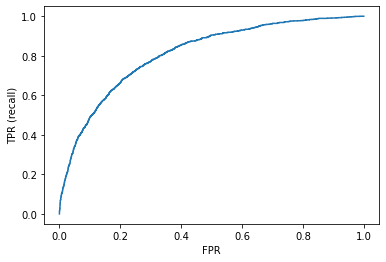

In [11]:
# Plotting ROC curve for Logistic Regression

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, bestModel.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

log_auc = roc_auc_score(y_test,y_test_hat) 
print("AUC for log: {:.3f}".format(log_auc))

In [12]:
# Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_hat))

print("Classification Report:")
print(classification_report(y_test,y_test_hat))

Confusion Matrix:
[[4114  306]
 [ 940  640]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4420
           1       0.68      0.41      0.51      1580

    accuracy                           0.79      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.78      0.79      0.77      6000



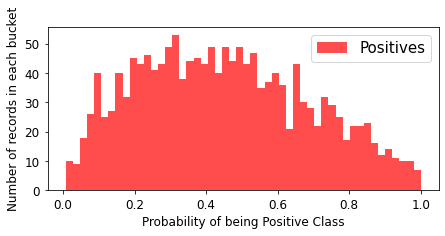

In [13]:
#Predicting the probabilities of being the positive class with respect to number of records in each bucket.

from sklearn.datasets import make_classification
prediction= bestModel.predict_proba(X_test)[:,1]

plt.figure(figsize=(7,3))
#plt.hist(prediction[y_test==0], bins=50, label='Negatives')
plt.hist(prediction[y_test==1], bins=50, label='Positives', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=12)
plt.ylabel('Number of records in each bucket', fontsize=12)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=12, pad=5)
plt.show()

<h3>Stochastic Gradient Descent</h3>

In [14]:
# Creating model, predicting, and calculating in-sample and out-sample accuracy
from sklearn.linear_model import SGDClassifier
#intializing the Stochastic Gradient model
modelg = SGDClassifier()
#fitting the training data to the model
modelg.fit(X_train, y_train)
#predicting train and test data with the trained model
y_train_hat_g = modelg.predict(X_train)
y_test_hat_g = modelg.predict(X_test)
#calculating the insample and out of sample accuracy
print('in sample accuracy:{}'.format((accuracy_score(y_train,y_train_hat_g) * 100,2)))
print('Out of sample accuracy:{}'.format((accuracy_score(y_test,y_test_hat_g) * 100,2)))

in sample accuracy:(78.99285714285715, 2)
Out of sample accuracy:(78.8, 2)


AUC for log: 0.668


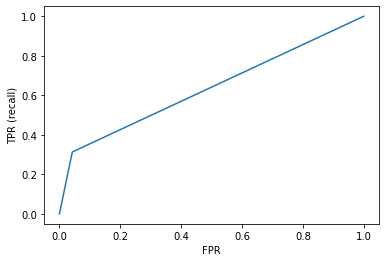

In [15]:
# Plotting ROC curve for SGDClassifier
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_g)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

log_auc = roc_auc_score(y_test,y_test_hat) 
print("AUC for log: {:.3f}".format(log_auc))

In [16]:
#calculating Classification Report and Confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat_g))
print("Classification Report")
print(classification_report(y_test,y_test_hat_g))

Confusion Matrix
[[4233  187]
 [1085  495]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4420
           1       0.73      0.31      0.44      1580

    accuracy                           0.79      6000
   macro avg       0.76      0.64      0.65      6000
weighted avg       0.78      0.79      0.76      6000



<h3>K-Nearest Neighbours</h3>

In [ ]:
# # KNN
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import StratifiedKFold
# #intializing the KNN
# KNN_model = KNeighborsClassifier()
# #Doing grid search cross validation with n_neighbors.
# param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
# cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
# grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
#                     return_train_score=True)
# #Fitting the training values
# grid.fit(X_train, y_train)

# print("Best Parameter: {}".format(grid.best_params_))
# print("Best Cross Vlidation Score: {}".format(grid.best_score_))

In [18]:
# Creating model, predicting, and calculating in-sample and out-sample accuracy
from sklearn.neighbors import KNeighborsClassifier
#Assigning the best parameter model
KNN_model = KNeighborsClassifier(n_neighbors=19)
#fitting the training data to the model
KNN_model.fit(X_train, y_train)
#predict the train and test data
y_test_hat_KNN = KNN_model.predict(X_test)
y_train_hat_KNN = KNN_model.predict(X_train)
#Calculating the insample and out-of-sample accuracy.
print('The in-sample accuracy is '+str(accuracy_score(y_train,y_train_hat_KNN, normalize = True) * 100))
print('The out-of-sample accuracy is '+str(accuracy_score(y_test,y_test_hat_KNN, normalize = True) * 100))

The in-sample accuracy is 78.97857142857143
The out-of-sample accuracy is 77.23333333333333


AUC for log: 0.607


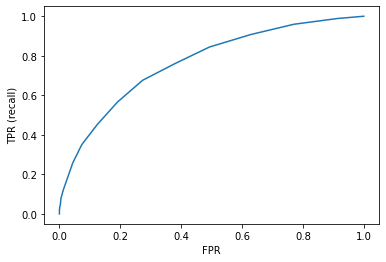

In [19]:
#plotting the ROC curve for KNN
fpr, tpr, thresholds = roc_curve(y_test, KNN_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

log_auc = roc_auc_score(y_test,y_test_hat_KNN) 
print("AUC for log: {:.3f}".format(log_auc))

In [20]:
# Classification report and Confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat_KNN))
print("Classification Report")
print(classification_report(y_test,y_test_hat_KNN))

Confusion Matrix
[[4226  194]
 [1172  408]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4420
           1       0.68      0.26      0.37      1580

    accuracy                           0.77      6000
   macro avg       0.73      0.61      0.62      6000
weighted avg       0.76      0.77      0.73      6000



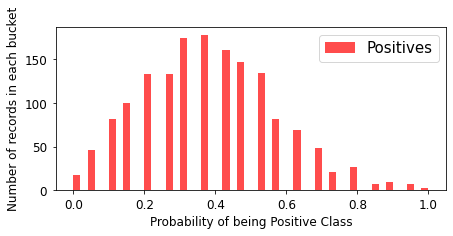

In [21]:
prediction= KNN_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(7,3))
#plt.hist(prediction[y_test==0], bins=50, label='Negatives')
plt.hist(prediction[y_test==1], bins=50, label='Positives', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=12)
plt.ylabel('Number of records in each bucket', fontsize=12)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=12, pad=5)
plt.show()

<h3>Decision Tree</h3>

In [23]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import StratifiedKFold
# Initialized the model to decision tree classifier
model= DecisionTreeClassifier()
# depth is set in the range of 2 to 15
param_grid = {'max_depth': np.arange(2, 15)}
#initialized the cross validation with 5 equal parts 
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
# fitting grid search by selecting accuracy as the metric.
grid = GridSearchCV(model, param_grid, cv = cv, 
                    return_train_score=True, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
#printing best parameters
print("Best Parameter: {}".format(grid.best_params_))

Best Parameter: {'max_depth': 4}


In [24]:
# Creating model, predicting, and calculating in-sample and out-sample accuracy
#fitted decision tree with depth of 4
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)
#predicting output for train data
dy_train_hat = dtc.predict(X_train)
#predicting output for test data
dy_test_hat = dtc.predict(X_test)
print('The in-sample accuracy is '+str(accuracy_score(y_train,dy_train_hat, normalize = True) * 100))
print('The out-of-sample accuracy is '+str(accuracy_score(y_test,dy_test_hat, normalize = True) * 100))

The in-sample accuracy is 74.91428571428571
The out-of-sample accuracy is 74.01666666666667


AUC for log: 0.545


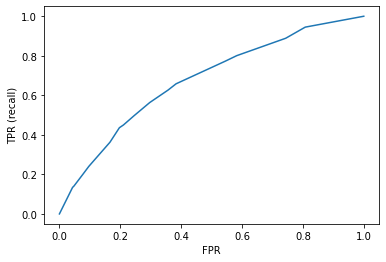

In [25]:
#plotting the ROC curve for Decision Tree
fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

log_auc = roc_auc_score(y_test,dy_test_hat) 
print("AUC for log: {:.3f}".format(log_auc))

In [26]:
#calculating Classification report and confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,dy_test_hat))
print("Classification report")
print(classification_report(y_test,dy_test_hat))

Confusion Matrix
[[4229  191]
 [1368  212]]
Classification report
              precision    recall  f1-score   support

           0       0.76      0.96      0.84      4420
           1       0.53      0.13      0.21      1580

    accuracy                           0.74      6000
   macro avg       0.64      0.55      0.53      6000
weighted avg       0.70      0.74      0.68      6000



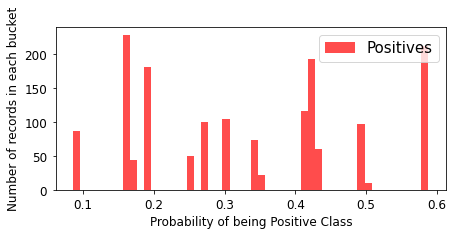

In [27]:
prediction= dtc.predict_proba(X_test)[:,1]

plt.figure(figsize=(7,3))
#plt.hist(prediction[y_test==0], bins=50, label='Negatives')
plt.hist(prediction[y_test==1], bins=50, label='Positives', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=12)
plt.ylabel('Number of records in each bucket', fontsize=12)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=12, pad=5)
plt.show()

<h3>Random Forest Classifier</h3>

In [28]:
# Creating model, predicting, and calculating in-sample and out-sample accuracy

from sklearn.ensemble import RandomForestClassifier
#Trained data with random forest
bag = RandomForestClassifier(random_state=0,min_samples_split=7,min_samples_leaf=2)
bag.fit(X_train,y_train)
#predicting output for train data
ry_train_hat = bag.predict(X_train)
#predicting output for test data
ry_test_hat = bag.predict(X_test)
print('The in-sample accuracy is '+str(accuracy_score(y_train,ry_train_hat, normalize = True) * 100))
print('The out-of-sample accuracy is '+str(accuracy_score(y_test,ry_test_hat, normalize = True) * 100))

The in-sample accuracy is 99.52142857142857
The out-of-sample accuracy is 76.0


AUC for log: 0.561


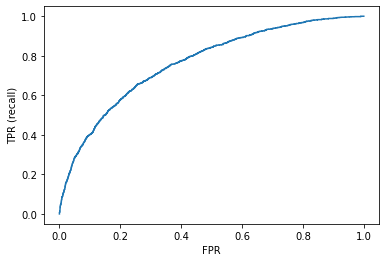

In [29]:
#plotting the ROC curve for Random Forest Classifier
fpr, tpr, thresholds = roc_curve(y_test, bag.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

log_auc = roc_auc_score(y_test,ry_test_hat) 
print("AUC for log: {:.3f}".format(log_auc))

In [30]:
#calculating Classification report and confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,ry_test_hat))
print("Classification report")
print(classification_report(y_test,ry_test_hat))

Confusion Matrix
[[4336   84]
 [1356  224]]
Classification report
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4420
           1       0.73      0.14      0.24      1580

    accuracy                           0.76      6000
   macro avg       0.74      0.56      0.55      6000
weighted avg       0.75      0.76      0.69      6000



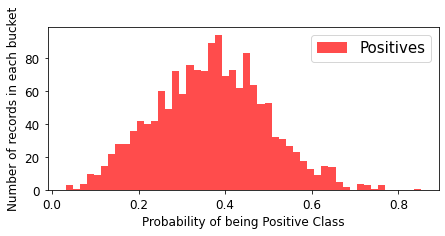

In [31]:
prediction= bag.predict_proba(X_test)[:,1]

plt.figure(figsize=(7,3))
#plt.hist(prediction[y_test==0], bins=50, label='Negatives')
plt.hist(prediction[y_test==1], bins=50, label='Positives', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=12)
plt.ylabel('Number of records in each bucket', fontsize=12)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=12, pad=5)
plt.show()

# Data Preprocessing for Evaluation Dataset

In [32]:
#Readigng evaluation data set
eval_dataset = pd.read_csv('movie_story_evaluation_file.csv')
eval_dataset
# Reading movie dataset
movies=pd.read_csv('movies.csv')

In [33]:
#Merging the genres and evaluation story dataset on movieid.
eval_dataset = pd.merge(eval_dataset,movies, left_on='movie_id',right_on='movieId', ).drop(['movieId','title'],axis=1)
eval_dataset

,movie_id,story,genres
0,122349,Growing up in the Mission district of San Fran...,Drama
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance
...,...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap...",Drama|Fantasy|Sci-Fi
3494,131064,After living for years as a struggling artist ...,Comedy
3495,131066,Ronal is a young barbarian with low self-estee...,Adventure|Animation|Fantasy
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",Comedy


In [34]:
#Assigning labels 0 or 1 for the evalution stories 
test=0
test2=[]
for x in eval_dataset.genres:
    if 'Comedy' in x:
        test2.append(1)
    else:
        test2.append(0)
        
eval_dataset['ComedyGenre2'] = test2

eval_dataset

,movie_id,story,genres,ComedyGenre2
0,122349,Growing up in the Mission district of San Fran...,Drama,0
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller,0
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy,1
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance,0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance,0
...,...,...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap...",Drama|Fantasy|Sci-Fi,0
3494,131064,After living for years as a struggling artist ...,Comedy,1
3495,131066,Ronal is a young barbarian with low self-estee...,Adventure|Animation|Fantasy,0
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",Comedy,1


In [35]:
#Removing any digits and '\' present
eval_dataset['story'] = eval_dataset['story'].str.replace('\d+', '')
eval_dataset['story'] = eval_dataset['story'].str.replace('\\', '')

descriptions2 = eval_dataset.loc[:,'story']

target2 = eval_dataset.loc[:,'ComedyGenre2']
eval_dataset

,movie_id,story,genres,ComedyGenre2
0,122349,Growing up in the Mission district of San Fran...,Drama,0
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller,0
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy,1
3,187901,"When an honest cop, Vijay Kumar's family is ru...",Action|Romance,0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance,0
...,...,...,...,...
3493,131062,"In the middle of nowhere, years after an apoc...",Drama|Fantasy|Sci-Fi,0
3494,131064,After living for years as a struggling artist ...,Comedy,1
3495,131066,Ronal is a young barbarian with low self-estee...,Adventure|Animation|Fantasy,0
3496,131068,"Ziege, Hxcxaschen and Max have now moved to Be...",Comedy,1


In [36]:
#sample end, real embedding starts
# Compute embeddings for each review:
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from tqdm import tqdm
embeddings2 = []
for review in tqdm(descriptions2):
    #review = review.decode("utf-8")
    base_embedding = np.zeros((300,))
    word_count = 0
    for token in word_tokenize(review):
        token = token.lower()
        if token in stopwords.words('english'):
            continue
        try:
            base_embedding += embeddings_index[token]
            word_count +=1
        except:
            continue
    base_embedding = base_embedding/word_count
    embeddings2.append(base_embedding)

100%|██████████████████████████████████████████████████████████████████████████████| 3498/3498 [01:00<00:00, 58.00it/s]


In [37]:
X2 = np.array(embeddings2)
X2.shape

(3498, 300)

# Testing Evaluation dataset using Best model i.e., Logistic Regression

In [38]:
#predicting the labels of the evalution story dataset
model_eval = grid1.best_estimator_
y_test_hat2 = model_eval.predict(X2)
#Calculating Accuracy
print('Out of sample accuracy:{}'.format((accuracy_score(target2 , y_test_hat2) * 100)))

Out of sample accuracy:79.70268724985706


AUC for log: 0.663


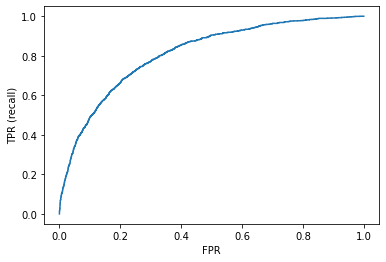

In [39]:
# Plotting the ROC curve for Eval Dataset
fpr, tpr, thresholds = roc_curve(y_test, model_eval.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

log_auc = roc_auc_score(target2, y_test_hat2) 
print("AUC for log: {:.3f}".format(log_auc))

In [40]:
#calculating Classification report and confusion matrix
print("Confusion Matrix")
print(confusion_matrix(target2,y_test_hat2))
print("Classification report")
print(classification_report(target2,y_test_hat2))

Confusion Matrix
[[2443  180]
 [ 530  345]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2623
           1       0.66      0.39      0.49       875

    accuracy                           0.80      3498
   macro avg       0.74      0.66      0.68      3498
weighted avg       0.78      0.80      0.78      3498



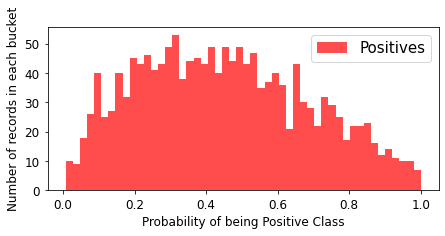

In [41]:
prediction= model_eval.predict_proba(X_test)[:,1]

plt.figure(figsize=(7,3))
#plt.hist(prediction[y_test==0], bins=50, label='Negatives')
plt.hist(prediction[y_test==1], bins=50, label='Positives', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=12)
plt.ylabel('Number of records in each bucket', fontsize=12)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=12, pad=5)
plt.show()

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final submited file should be very well structured and should have a consistent flow of analysis.</li>
    <li>You may want to use an additional word document to report the result of your analysis</li>
</ul>

#### Due Date: Nov 30 2020 at 11:59 PM

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">100%</b></td>
    </tr>
</table>